### Bivariate and Multivariate Analysis

The term <b style = "color:orange">bivariate analysis</b> refers to the analysis of two variables. The purpose of bivariate analysis is to understand the relationship between two variables.

When we try to understand the relationship between more than 2 variables, then we call this analysis a <b style ="color:orange">multivariate analysis</b>.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = sns.load_dataset('tips')

In [3]:
iris = sns.load_dataset('iris')

In [4]:
flights = sns.load_dataset('flights')

In [33]:
titanic = pd.read_csv('titanic.csv')

### Scatter Plot (Numerical - Numerical)

A <b style = "color:orange">scatter plot</b> is a diagram where each value in the data set is represented by a dot.

In [6]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

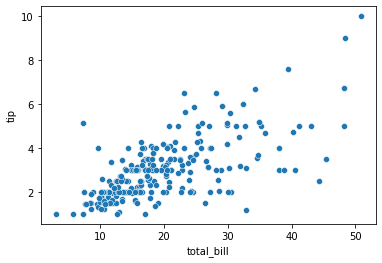

In [7]:
#Bivariate analysis
sns.scatterplot(x = tips['total_bill'],y = tips['tip'])

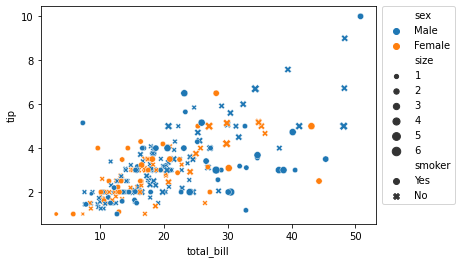

In [8]:
#multivariate analysis
sns.scatterplot(x = tips['total_bill'],y = tips['tip'], hue=tips['sex'],size = tips['size'],style=tips['smoker'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

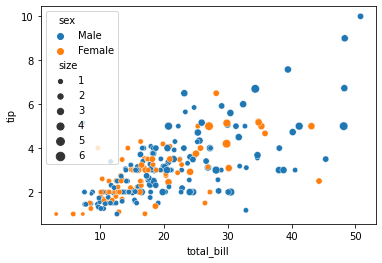

In [9]:
sns.scatterplot(x = tips['total_bill'],y = tips['tip'], hue=tips['sex'],size = tips['size'])

### Bar Plot (Numerical - Categorical)

A <b style = "color:orange">bar plot</b> shows catergorical data as rectangular bars with heights proportional to the value they represent. Normally in x axis, you put the categorical data and in y axis, you keep numerical values. 

In [10]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
titanic['Pclass'].value_counts()    #univariate analysis

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

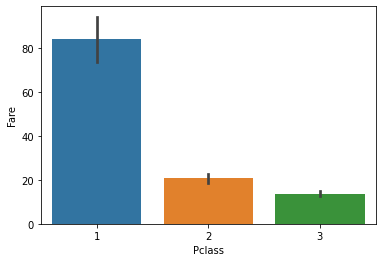

In [12]:
sns.barplot(x = titanic['Pclass'],y = titanic['Fare'])

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

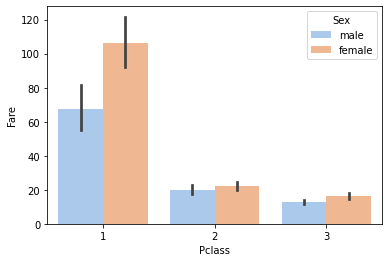

In [13]:
sns.barplot(x = titanic['Pclass'],y = titanic['Fare'],hue = titanic['Sex'],palette='pastel')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

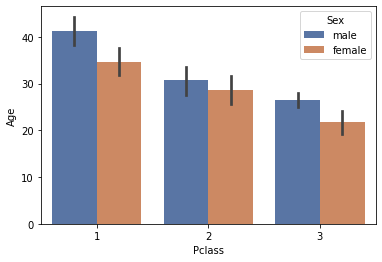

In [14]:
#The average age of male in every class is higher than their female counterparts.
sns.barplot(x = titanic['Pclass'],y = titanic['Age'],hue = titanic['Sex'],palette='deep')

### Box Plot (Numerical - Categorical)



<AxesSubplot:xlabel='Pclass', ylabel='Age'>

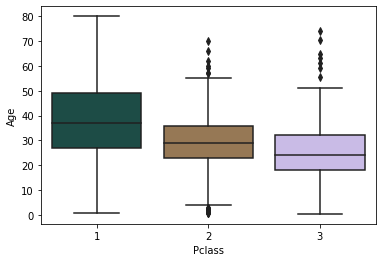

In [15]:
#bivariate
sns.boxplot(x = titanic['Pclass'],y = titanic['Age'],palette='cubehelix')

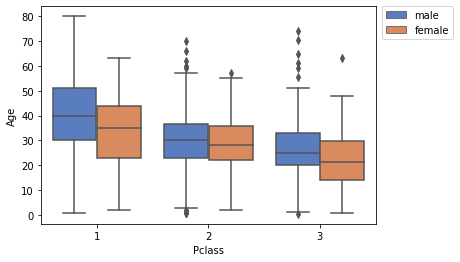

In [16]:
#multivariate
sns.boxplot(x = titanic['Pclass'],y = titanic['Age'],hue = titanic['Sex'],palette='muted')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#we can see in male there are lot of outliers than female.

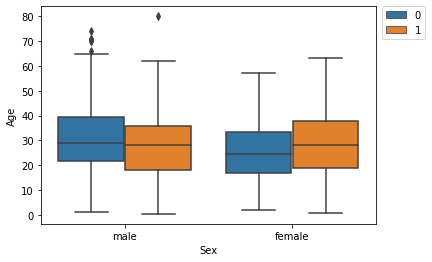

In [17]:
sns.boxplot(x = titanic['Sex'],y = titanic['Age'],hue = titanic['Survived'])
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

### Displot (Numerical - Categorical)

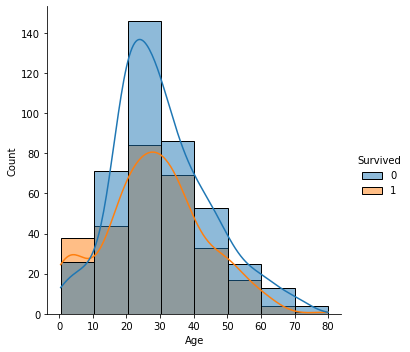

In [110]:
sns.displot(x = titanic['Age'],kde = True,bins =8,hue = titanic['Survived'])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

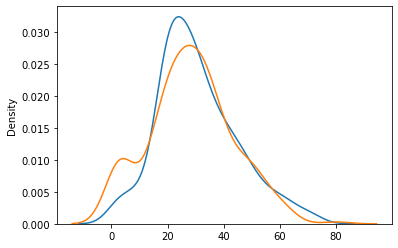

In [111]:
sns.distplot(x = (titanic[titanic['Survived'] == 0])['Age'],hist = False)
sns.distplot(x = (titanic[titanic['Survived'] == 1])['Age'],hist = False)

<AxesSubplot:xlabel='Age', ylabel='Density'>

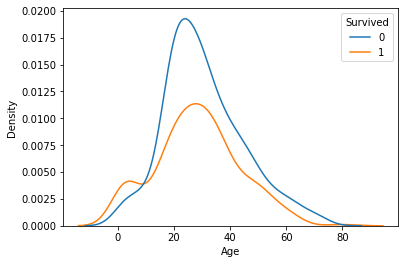

In [116]:
"""
The reason the two plots don't look the same is that we are passing the entire data for Age to sns.kdeplot and 
seaborn understands that there are two categories and that the area under the both curves combined together must sum to 1.
While in the above plot, the
"""
sns.kdeplot(titanic['Age'],hue = titanic['Survived'])

### HeatMap 


A <b style = "color:orange">heatmap</b> contains values representing various shades of the same colour for each value to be plotted.

In [62]:
grid = pd.crosstab(titanic['Pclass'],titanic['Survived'])
grid

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

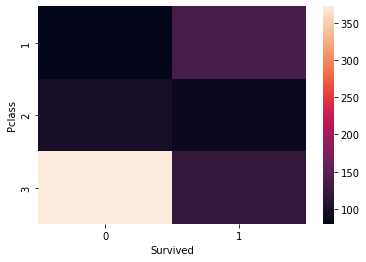

In [61]:
sns.heatmap(grid)

In [78]:
#Gives us the percentage of how many people survived in each class.
survival_percentage = titanic.groupby('Pclass')['Survived'].mean() *100
survival_percentage

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass'>

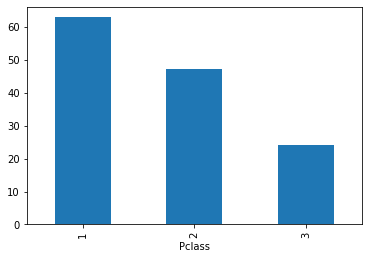

In [79]:
(titanic.groupby('Pclass')['Survived'].mean() *100).plot(kind = 'bar',)

#### Heatmap on flights dataset

In [99]:
flights.head(4)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129


In [102]:
pivot_tbl = flights.pivot_table(values = 'passengers',index = 'month',columns = 'year')
pivot_tbl

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

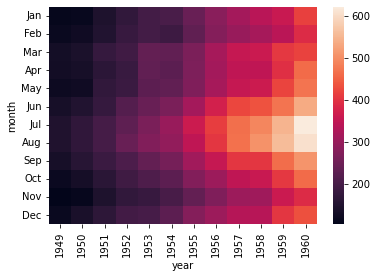

In [101]:
sns.heatmap(pivot_tbl)

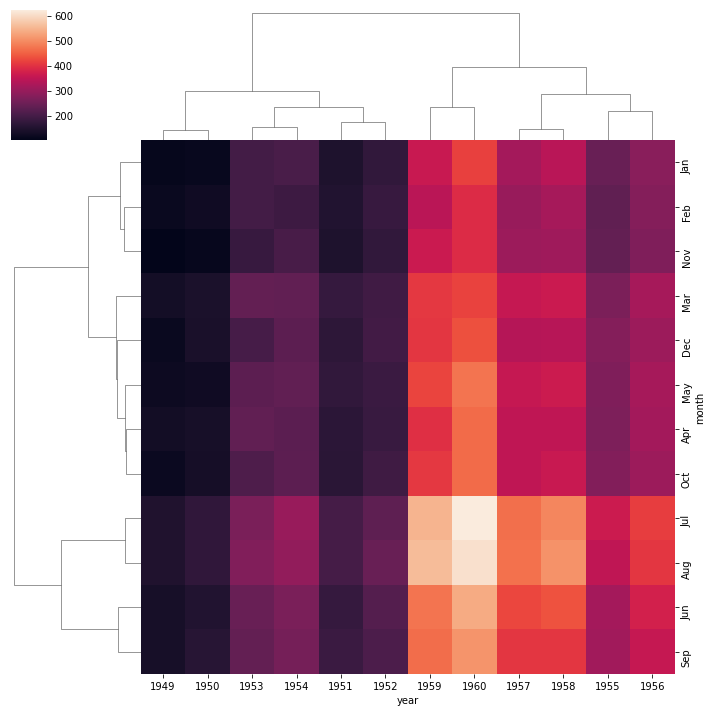

In [103]:
sns.clustermap(pivot_tbl)

### Cluster Map (Categorical - Categorical)

Seaborn's <b style = "color:orange">clustermap</b> function is great for making simple heatmaps and hierarchically-clustered heatmaps with <b style = "color:orange">dendrograms</b> on both rows and/or columns. Most often when you try to make heatmap you would also like to cluster row-wise or col-wise to see if there is any pattern emerges.

<b style = "color:green">Dendogram</b> - a branching diagram representing a hierarchy of categories based on degree of similarity or number of shared characteristics especially in biological taxonomy.

In [86]:
grid1 = pd.crosstab(titanic['Parch'],titanic['Survived'])
grid1

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


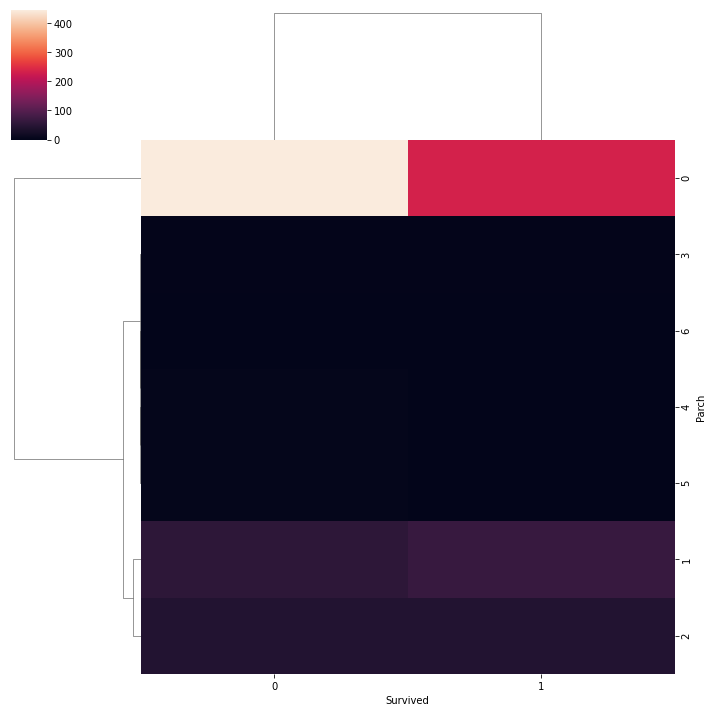

In [87]:
sns.clustermap(grid1)

### Pair Plot (Numerical - Numerical)

It is a collection of scatter plots. A <b style = "color:orange">pairplot</b> generates pairwise relationships in a dataset for every numerical columns. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

In [90]:
iris.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


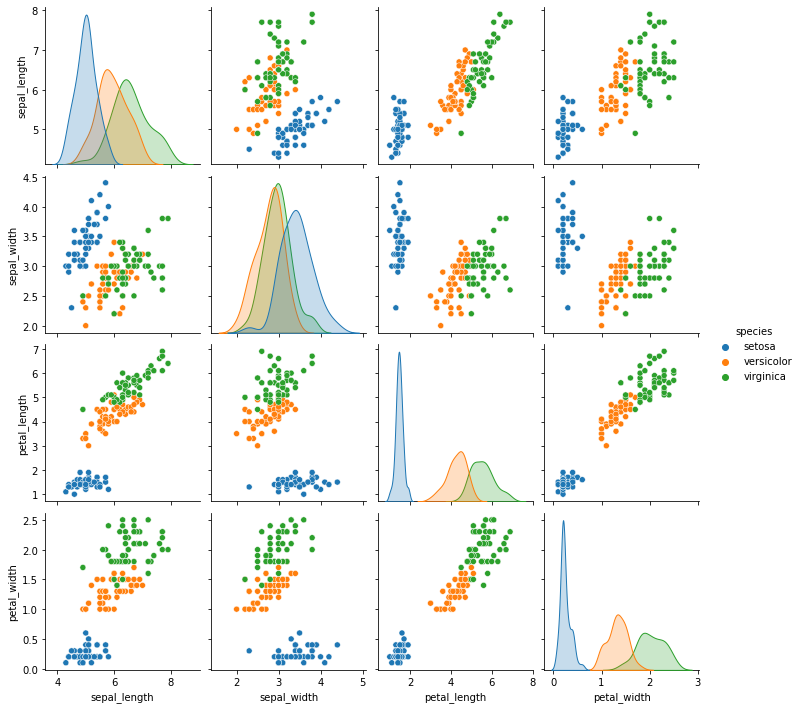

In [92]:
sns.pairplot(iris,hue = 'species')

### Line Plot (Numerical - Numerical)

Best when the data in x asix is time based. It simply adds the dots of scatter plot.

In [93]:
flights.head(6)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135


In [96]:
flights_new = flights.groupby('year').sum().reset_index()
flights_new

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


<AxesSubplot:xlabel='year', ylabel='passengers'>

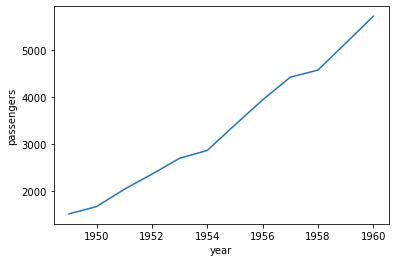

In [98]:
sns.lineplot(x = flights_new['year'],y = flights_new['passengers'])